In [2]:
from __future__ import print_function
from __future__ import division

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_context(rc={'figure.figsize': (14, 7) } )
figzize_me = figsize =(14, 7)
# import warnings; warnings.simplefilter('ignore')
import pandas as pd
pd.options.display.max_columns = 12

import os
import sys
# 使用insert 0即只使用github，避免交叉使用了pip安装的abupy，导致的版本不一致问题
sys.path.insert(0, os.path.abspath('../'))
import abupy
from abupy import xrange, range

# 打开测试数据环境，与书中的例子数据一致，使用RomDataBu下的df_kl.h5数据
abupy.env.enable_example_env_ipython()

only use pandas calc nd, please install talib!
enable example env will only read RomDataBu/df_kl.h5


In [2]:
print(sys.version)

3.6.0 |Anaconda 4.3.1 (x86_64)| (default, Dec 23 2016, 13:19:00) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]


# 第4章 量化工具-Pandas

[abu量化系统github地址](https://github.com/bbfamily/abu) (您的star是我的动力！)

[abu量化文档教程ipython notebook](https://github.com/bbfamily/abu/tree/master/abupy_lecture)

## 4.1 基本操作方法

### 4.1.1 DataFrame构建及方法

In [3]:
import pandas as pd

In [4]:
stock_day_change = np.load('../gen/stock_day_change.npy')
stock_day_change.shape

(200, 504)

In [5]:
# 下面三种写法输出完全相同，输出如表4-1所示
pd.DataFrame(stock_day_change).head()
pd.DataFrame(stock_day_change).head(5)
pd.DataFrame(stock_day_change)[:5]

,0,1,2,3,4,5,...,498,499,500,501,502,503
0,0.380355,0.122597,-0.285190,-0.008897,0.457319,0.109334,...,1.096122,-0.695501,-1.534180,0.594247,1.246791,0.343928
1,0.133810,-0.493126,1.447011,-1.034918,0.422955,0.366225,...,0.241180,1.061386,-0.817782,1.320760,0.739726,1.703807
2,1.496958,1.174205,0.261256,0.703780,1.318616,-0.479024,...,0.864355,1.212367,0.270861,-0.738852,-0.333497,-0.357874
3,-1.570125,0.252668,1.145843,0.293087,-1.299284,0.316227,...,1.366721,-0.295101,-0.957499,-0.251030,-0.141368,0.769644
4,1.307191,0.276648,-0.287054,-0.125589,-0.217242,-0.013351,...,-1.214889,-0.199725,1.099271,0.370935,-0.409567,-0.031080


### 4.1.2 索引行列序列

In [6]:
# 股票0 -> 股票stock_day_change.shape[0]
stock_symbols = ['股票 ' + str(x) for x in
                 xrange(stock_day_change.shape[0])]
# 通过构造直接设置index参数，head(2)就显示两行，表4-2所示
pd.DataFrame(stock_day_change, index=stock_symbols).head(2)

,0,1,2,3,4,5,...,498,499,500,501,502,503
股票 0,0.380355,0.122597,-0.285190,-0.008897,0.457319,0.109334,...,1.096122,-0.695501,-1.534180,0.594247,1.246791,0.343928
股票 1,0.133810,-0.493126,1.447011,-1.034918,0.422955,0.366225,...,0.241180,1.061386,-0.817782,1.320760,0.739726,1.703807


In [7]:
# 从2017-1-1向上时间递进，单位freq='1d'即1天
days = pd.date_range('2017-1-1',
                     periods=stock_day_change.shape[1], freq='1d')
# 股票0 -> 股票stock_day_change.shape[0]
stock_symbols = ['股票 ' + str(x) for x in
                 xrange(stock_day_change.shape[0])]
# 分别设置index和columns
df = pd.DataFrame(stock_day_change, index=stock_symbols, columns=days)
# 表4-3所示
df.head(2)

,2017-01-01 00:00:00,2017-01-02 00:00:00,2017-01-03 00:00:00,2017-01-04 00:00:00,2017-01-05 00:00:00,2017-01-06 00:00:00,...,2018-05-14 00:00:00,2018-05-15 00:00:00,2018-05-16 00:00:00,2018-05-17 00:00:00,2018-05-18 00:00:00,2018-05-19 00:00:00
股票 0,0.380355,0.122597,-0.285190,-0.008897,0.457319,0.109334,...,1.096122,-0.695501,-1.534180,0.594247,1.246791,0.343928
股票 1,0.133810,-0.493126,1.447011,-1.034918,0.422955,0.366225,...,0.241180,1.061386,-0.817782,1.320760,0.739726,1.703807


### 4.1.3 金融时间序列

In [8]:
# df做个转置
df = df.T
# 表4-4所示
df.head()

,股票 0,股票 1,股票 2,股票 3,股票 4,股票 5,...,股票 194,股票 195,股票 196,股票 197,股票 198,股票 199
2017-01-01,0.380355,0.133810,1.496958,-1.570125,1.307191,-0.822087,...,-0.184585,1.245802,0.045201,-0.558521,-1.213311,-0.184731
2017-01-02,0.122597,-0.493126,1.174205,0.252668,0.276648,-1.114597,...,0.457794,0.447693,0.710103,-0.587533,0.093677,-0.463196
2017-01-03,-0.285190,1.447011,0.261256,1.145843,-0.287054,-0.797058,...,1.212614,2.500148,0.814453,-0.130282,-0.310447,-0.946728
2017-01-04,-0.008897,-1.034918,0.703780,0.293087,-0.125589,1.945349,...,0.199341,1.606920,0.084539,0.422849,1.629633,1.155346
2017-01-05,0.457319,0.422955,1.318616,-1.299284,-0.217242,-1.660612,...,-0.815535,0.787376,0.542710,-0.157260,1.019846,0.251412


In [9]:
# df_20 = df.resample('21D', how='mean')
from abupy import pd_resample
df_20 = pd_resample(df, '21D', how='mean')
# 表4-5所示
df_20.head()

,股票 0,股票 1,股票 2,股票 3,股票 4,股票 5,...,股票 194,股票 195,股票 196,股票 197,股票 198,股票 199
2017-01-01,0.101295,0.367820,0.075089,-0.102398,0.141279,-0.144679,...,-0.145753,0.196853,-0.296633,-0.455264,-0.056664,0.183957
2017-01-22,-0.058951,-0.377245,0.376972,-0.011026,0.381368,0.016134,...,0.047927,-0.301956,0.201439,0.145753,0.196472,-0.035589
2017-02-12,-0.138417,-0.244038,0.001510,0.036972,-0.183559,0.355932,...,0.100974,-0.097821,0.208232,0.053988,0.006973,0.077153
2017-03-05,0.385774,-0.102745,0.245720,-0.219062,0.085310,-0.135895,...,-0.225311,0.257156,0.140883,0.371555,-0.193469,-0.265355
2017-03-26,-0.076464,-0.008265,0.038223,0.118823,0.647744,-0.257020,...,0.113628,-0.461755,0.031637,-0.130856,-0.258763,-0.113054


### 4.1.4 Series构建及方法

In [10]:
df_stock0 = df['股票 0']
# 打印df_stock0类型
print(type(df_stock0))
# 打印出Series的前5行数据, 与DataFrame一致
df_stock0.head()

<class 'pandas.core.series.Series'>


2017-01-01    0.380355
2017-01-02    0.122597
2017-01-03   -0.285190
2017-01-04   -0.008897
2017-01-05    0.457319
Freq: D, Name: 股票 0, dtype: float64

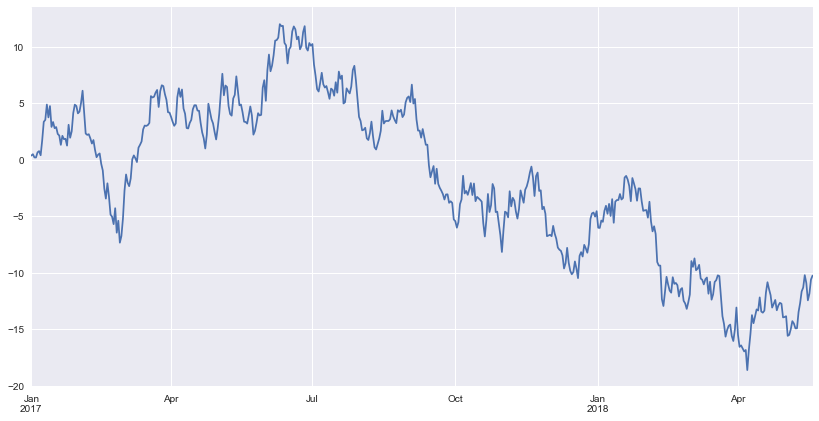

In [11]:
df_stock0.cumsum().plot()

### 4.1.5 重采样数据

In [12]:
from abupy import pd_resample
# 以5天为周期重采样（周k）
# df_stock0_5 = df_stock0.cumsum().resample('5D', how='ohlc')
df_stock0_5 = pd_resample(df_stock0.cumsum(), '5D', how='ohlc')
# 以21天为周期重采样（月k），
# df_stock0_20 = df_stock0.cumsum().resample('21D', how='ohlc')
df_stock0_20 = pd_resample(df_stock0.cumsum(), '21D', how='ohlc')
# 打印5天重采样，如下输出2017-01-01, 2017-01-06, 2017-01-11, 表4-6所示
df_stock0_5.head()

,open,high,low,close
2017-01-01,0.380355,0.666184,0.208865,0.666184
2017-01-06,0.775518,3.543428,0.407425,3.543428
2017-01-11,4.897457,4.897457,2.917848,3.350685
2017-01-16,2.802112,2.905378,1.329033,1.329033
2017-01-21,2.127188,3.107789,1.262423,3.107789


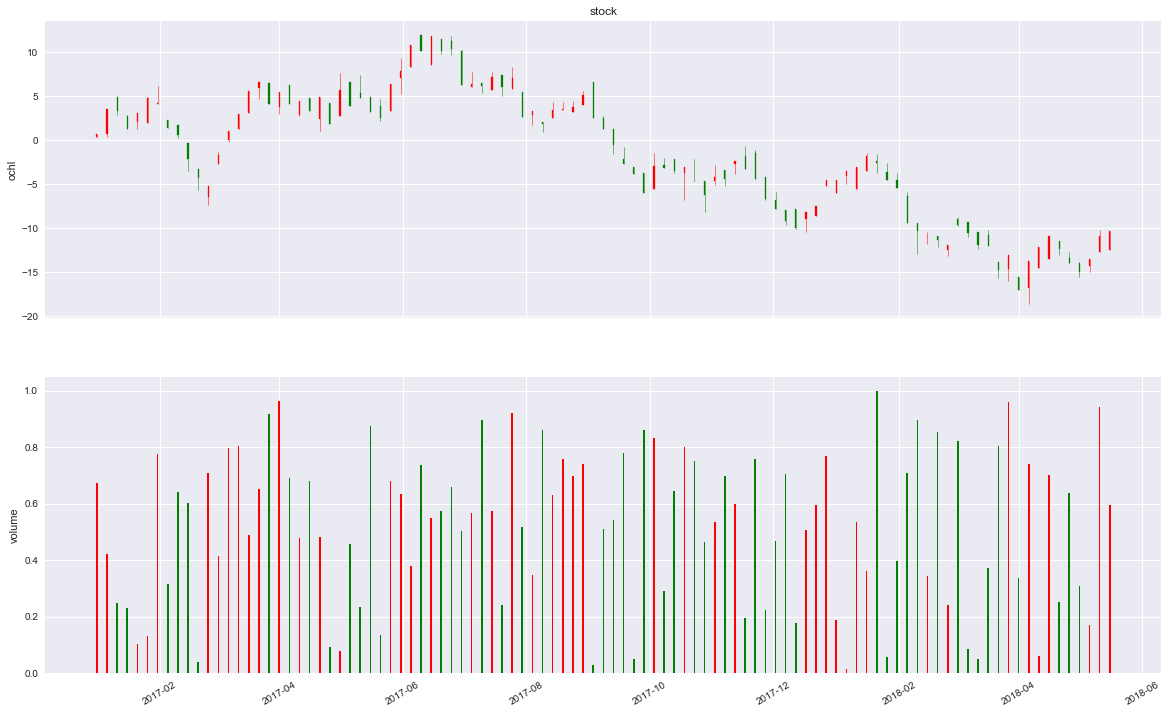

In [13]:
from abupy import ABuMarketDrawing 
# 图4-2所示
ABuMarketDrawing.plot_candle_stick(df_stock0_5.index,
                                   df_stock0_5['open'].values,
                                   df_stock0_5['high'].values,
                                   df_stock0_5['low'].values,
                                   df_stock0_5['close'].values,
                                   np.random.random(len(df_stock0_5)),
                                   None, 'stock', day_sum=False,
                                   html_bk=False, save=False)

In [14]:
print(type(df_stock0_5['open'].values))
print(df_stock0_5['open'].index)
print(df_stock0_5.columns)

<class 'numpy.ndarray'>
DatetimeIndex(['2017-01-01', '2017-01-06', '2017-01-11', '2017-01-16',
               '2017-01-21', '2017-01-26', '2017-01-31', '2017-02-05',
               '2017-02-10', '2017-02-15',
               ...
               '2018-04-01', '2018-04-06', '2018-04-11', '2018-04-16',
               '2018-04-21', '2018-04-26', '2018-05-01', '2018-05-06',
               '2018-05-11', '2018-05-16'],
              dtype='datetime64[ns]', length=101, freq='5D')
Index(['open', 'high', 'low', 'close'], dtype='object')


## 4.2 基本数据分析示例

In [15]:
from abupy import ABuSymbolPd

In [16]:
# n_folds=2两年
tsla_df = ABuSymbolPd.make_kl_df('usTSLA', n_folds=2)
# 表4-7所示
tsla_df.tail()

,close,high,low,p_change,open,pre_close,volume,date,date_week,key,atr21,atr14
2016-07-20,228.36,229.800,225.00,1.38,226.47,225.26,2568498,20160720,2,499,9.192273,8.723406
2016-07-21,220.50,227.847,219.10,-3.44,226.00,228.36,4428651,20160721,3,500,9.171070,8.725091
2016-07-22,222.27,224.500,218.88,0.80,221.99,220.50,2579692,20160722,4,501,9.185781,8.779013
2016-07-25,230.01,231.390,221.37,3.48,222.27,222.27,4490683,20160725,0,502,9.266934,8.929798
2016-07-26,225.93,228.740,225.63,-1.77,227.34,230.01,41833,20160726,1,503,9.133747,8.754098


### 4.2.1 数据整体分析

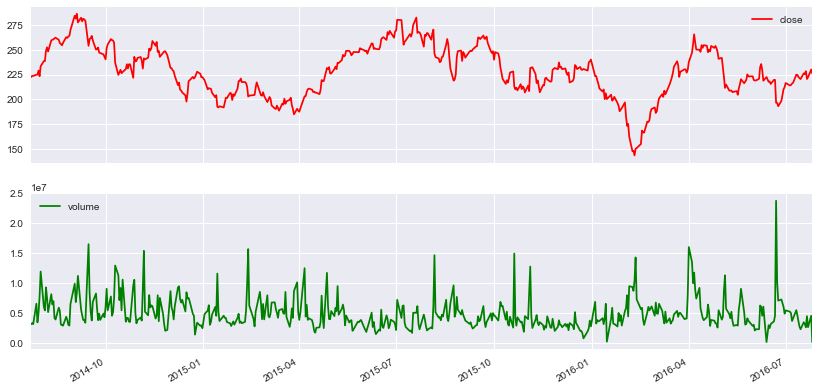

In [17]:
tsla_df[['close', 'volume']].plot(subplots=True, style=['r', 'g'], grid=True);

In [18]:
tsla_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2014-07-23 to 2016-07-26
Data columns (total 12 columns):
close        504 non-null float64
high         504 non-null float64
low          504 non-null float64
p_change     504 non-null float64
open         504 non-null float64
pre_close    504 non-null float64
volume       504 non-null int64
date         504 non-null int64
date_week    504 non-null int64
key          504 non-null int64
atr21        504 non-null float64
atr14        504 non-null float64
dtypes: float64(8), int64(4)
memory usage: 51.2 KB


In [19]:
tsla_df.describe()

,close,high,low,p_change,open,pre_close,volume,date,date_week,key,atr21,atr14
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,5.040000e+02,5.040000e+02,504.000000,504.000000,504.000000,504.000000
mean,228.465298,232.135159,224.562637,0.037480,228.425823,228.458671,4.903847e+06,2.015121e+07,2.015873,251.500000,10.261677,10.259238
std,25.494660,25.272555,25.612276,2.607604,25.529992,25.505040,2.658002e+06,6.870752e+03,1.398574,145.636534,1.596009,1.871443
min,143.670000,154.970000,141.050000,-10.450000,142.320000,143.670000,4.183300e+04,2.014072e+07,0.000000,0.000000,6.780571,6.225096
25%,210.310000,214.517500,207.070000,-1.252500,210.717500,210.310000,3.185177e+06,2.015012e+07,1.000000,125.750000,9.184959,9.021982
50%,227.615000,231.825000,223.430000,0.065000,227.825000,227.615000,4.241794e+06,2.015072e+07,2.000000,251.500000,10.049454,10.060945
75%,248.480000,251.910000,245.557500,1.370000,248.852500,248.480000,5.803944e+06,2.016012e+07,3.000000,377.250000,11.408159,11.387866
max,286.040000,291.420000,280.400000,11.170000,287.670000,286.040000,2.374241e+07,2.016073e+07,4.000000,503.000000,14.931148,16.660318


### 4.2.2 索引选取和切片选择

In [20]:
# 2014-07-23至2014-07-31 开盘价格序列
tsla_df.loc['2014-07-23':'2014-07-31', 'open']

2014-07-23    220.01
2014-07-24    223.25
2014-07-25    222.72
2014-07-28    224.25
2014-07-29    226.61
2014-07-30    221.92
2014-07-31    229.26
Name: open, dtype: float64

In [21]:
# 2014-07-23至2014-07-31 所有序列，表4-9所示
tsla_df.loc['2014-07-23':'2014-07-31']

,close,high,low,p_change,open,pre_close,volume,date,date_week,key,atr21,atr14
2014-07-23,222.49,224.75,219.43,1.33,220.01,219.58,3088731,20140723,2,0,8.977539,8.459104
2014-07-24,223.54,225.10,220.80,0.47,223.25,222.49,3248410,20140724,3,1,8.812894,8.249168
2014-07-25,223.57,226.97,221.75,0.01,222.72,223.54,3090383,20140725,4,2,8.641804,8.032799
2014-07-28,224.82,232.00,221.40,0.56,224.25,223.57,6517611,20140728,0,3,8.735052,8.216171
2014-07-29,225.01,228.30,224.86,0.08,226.61,224.82,3387187,20140729,1,4,8.544335,7.967158
2014-07-30,228.92,229.60,221.04,1.74,221.92,225.01,4927823,20140730,2,5,8.545081,8.009504
2014-07-31,223.30,231.40,221.50,-2.45,229.26,228.92,7749058,20140731,3,6,8.609601,8.144540


In [22]:
# [1:5]：(1，2，3，4)，[2:6]: (2, 3, 4, 5)
# 表4-10所示
tsla_df.iloc[1:5, 2:6]

,low,p_change,open,pre_close
2014-07-24,220.80,0.47,223.25,222.49
2014-07-25,221.75,0.01,222.72,223.54
2014-07-28,221.40,0.56,224.25,223.57
2014-07-29,224.86,0.08,226.61,224.82


In [23]:
# 切取所有行[2:6]: (2, 3, 4, 5)列
tsla_df.iloc[:, 2:6]
# 选取所有的列[35:37]:(35, 36)行，表4-11所示
tsla_df.iloc[35:37]

,close,high,low,p_change,open,pre_close,volume,date,date_week,key,atr21,atr14
2014-09-11,280.31,284.79,278.63,-0.28,280.46,281.10,3768584,20140911,3,35,9.114488,9.125375
2014-09-12,279.20,282.39,277.00,-0.40,280.50,280.31,3328302,20140912,4,36,8.937132,8.858562


In [24]:
# 指定一个列
print(tsla_df.close[0:3])
# 通过组成一个列表选择多个列，表4-12所示
tsla_df[['close', 'high', 'low']][0:3]

2014-07-23    222.49
2014-07-24    223.54
2014-07-25    223.57
Name: close, dtype: float64


,close,high,low
2014-07-23,222.49,224.75,219.43
2014-07-24,223.54,225.10,220.80
2014-07-25,223.57,226.97,221.75


### 4.2.3 逻辑条件进行数据筛选

In [25]:
# abs为取绝对值的意思，不是防抱死，表4-13所示
tsla_df[np.abs(tsla_df.p_change) > 8]

,close,high,low,p_change,open,pre_close,volume,date,date_week,key,atr21,atr14
2014-09-15,253.86,274.40,249.13,-9.08,274.370,279.20,16464949,20140915,0,37,9.996316,10.452951
2014-10-28,242.77,244.60,228.25,9.52,229.600,221.67,10516300,20141028,1,68,11.259016,11.439155
2015-08-06,246.13,255.00,236.12,-8.88,249.540,270.13,14623754,20150806,3,261,10.797217,11.594563
2015-08-27,242.99,244.75,230.81,8.07,231.000,224.84,7655959,20150827,3,276,14.347205,15.894958
2015-11-04,231.63,232.74,225.20,11.17,227.000,208.35,12726366,20151104,2,324,11.150358,10.872516
2016-02-08,147.99,157.15,146.00,-8.99,157.105,162.61,9312988,20160208,0,388,12.329239,13.355117
2016-02-17,168.68,169.34,156.68,8.71,159.000,155.17,5825159,20160217,2,394,13.205443,14.213429
2016-06-22,196.66,205.95,195.75,-10.45,199.470,219.61,23742414,20160622,2,481,9.890044,9.868338


In [26]:
tsla_df[(np.abs(tsla_df.p_change) > 8) & (tsla_df.volume > 2.5 * tsla_df.volume.mean())]

,close,high,low,p_change,open,pre_close,volume,date,date_week,key,atr21,atr14
2014-09-15,253.86,274.40,249.13,-9.08,274.37,279.20,16464949,20140915,0,37,9.996316,10.452951
2015-08-06,246.13,255.00,236.12,-8.88,249.54,270.13,14623754,20150806,3,261,10.797217,11.594563
2015-11-04,231.63,232.74,225.20,11.17,227.00,208.35,12726366,20151104,2,324,11.150358,10.872516
2016-06-22,196.66,205.95,195.75,-10.45,199.47,219.61,23742414,20160622,2,481,9.890044,9.868338


### 4.2.4 数据转换与规整

In [27]:
# deprecated sort_index use sort_values
# tsla_df.sort_index(by='p_change')[:5]
tsla_df.sort_values(by='p_change')[:5]

,close,high,low,p_change,open,pre_close,volume,date,date_week,key,atr21,atr14
2016-06-22,196.66,205.95,195.75,-10.45,199.470,219.61,23742414,20160622,2,481,9.890044,9.868338
2014-09-15,253.86,274.40,249.13,-9.08,274.370,279.20,16464949,20140915,0,37,9.996316,10.452951
2016-02-08,147.99,157.15,146.00,-8.99,157.105,162.61,9312988,20160208,0,388,12.329239,13.355117
2015-08-06,246.13,255.00,236.12,-8.88,249.540,270.13,14623754,20150806,3,261,10.797217,11.594563
2014-10-10,236.91,245.89,235.20,-7.82,244.640,257.01,12898280,20141010,4,56,10.898735,11.333807


In [28]:
# deprecated sort_index use sort_values
# tsla_df.sort_index(by='p_change', ascending=False)[:5]
tsla_df.sort_values(by='p_change', ascending=False)[:5]

,close,high,low,p_change,open,pre_close,volume,date,date_week,key,atr21,atr14
2015-11-04,231.63,232.74,225.20,11.17,227.00,208.35,12726366,20151104,2,324,11.150358,10.872516
2014-10-28,242.77,244.60,228.25,9.52,229.60,221.67,10516300,20141028,1,68,11.259016,11.439155
2016-02-17,168.68,169.34,156.68,8.71,159.00,155.17,5825159,20160217,2,394,13.205443,14.213429
2015-08-27,242.99,244.75,230.81,8.07,231.00,224.84,7655959,20150827,3,276,14.347205,15.894958
2016-02-22,177.74,178.91,169.85,6.70,170.12,166.58,5055340,20160222,0,397,13.033677,13.752159


In [29]:
# 如果一行的数据中存在na就删除这行
tsla_df.dropna()            
# 通过how控制 如果一行的数据中全部都是na就删除这行
tsla_df.dropna(how='all')    

# 使用指定值填充na， inplace代表就地操作，即不返回新的序列在原始序列上修改
tsla_df.fillna(tsla_df.mean(), inplace=True).head()

,close,high,low,p_change,open,pre_close,volume,date,date_week,key,atr21,atr14
2014-07-23,222.49,224.75,219.43,1.33,220.01,219.58,3088731,20140723,2,0,8.977539,8.459104
2014-07-24,223.54,225.10,220.80,0.47,223.25,222.49,3248410,20140724,3,1,8.812894,8.249168
2014-07-25,223.57,226.97,221.75,0.01,222.72,223.54,3090383,20140725,4,2,8.641804,8.032799
2014-07-28,224.82,232.00,221.40,0.56,224.25,223.57,6517611,20140728,0,3,8.735052,8.216171
2014-07-29,225.01,228.30,224.86,0.08,226.61,224.82,3387187,20140729,1,4,8.544335,7.967158


In [30]:
tsla_df.close[:3]

2014-07-23    222.49
2014-07-24    223.54
2014-07-25    223.57
Name: close, dtype: float64

In [31]:
tsla_df.close.pct_change()[:3]

2014-07-23         NaN
2014-07-24    0.004719
2014-07-25    0.000134
Name: close, dtype: float64

In [32]:
(223.54 - 222.49) / 222.49, (223.57 - 223.54) / 223.54

(0.004719313227560713, 0.00013420416927619727)

In [33]:
# pct_change对序列从第二项开始向前做减法在除以前一项，这样的针对close做pct_change后的结果就是涨跌幅
change_ratio = tsla_df.close.pct_change()
change_ratio.tail()

2016-07-20    0.013762
2016-07-21   -0.034419
2016-07-22    0.008027
2016-07-25    0.034823
2016-07-26   -0.017738
Name: close, dtype: float64

In [34]:
# 将change_ratio转变成与tsla_df.p_change字段一样的百分百，同样保留两位小数
np.round(change_ratio[-5:] * 100, 2)

2016-07-20    1.38
2016-07-21   -3.44
2016-07-22    0.80
2016-07-25    3.48
2016-07-26   -1.77
Name: close, dtype: float64

In [36]:
format = lambda x: '%.2f' % x
tsla_df.atr21.map(format).tail()

2016-07-20    9.19
2016-07-21    9.17
2016-07-22    9.19
2016-07-25    9.27
2016-07-26    9.13
Name: atr21, dtype: object

### 4.2.5 数据本地序列化操作

In [35]:
tsla_df.to_csv('../gen/tsla_df.csv', columns=tsla_df.columns, index=True)

In [36]:
tsla_df_load = pd.read_csv('../gen/tsla_df.csv', parse_dates=True, index_col=0)
tsla_df_load.head()

,close,high,low,p_change,open,pre_close,volume,date,date_week,key,atr21,atr14
2014-07-23,222.49,224.75,219.43,1.33,220.01,219.58,3088731,20140723,2,0,8.932286,10.202
2014-07-24,223.54,225.10,220.80,0.47,223.25,222.49,3248410,20140724,3,1,8.932286,10.202
2014-07-25,223.57,226.97,221.75,0.01,222.72,223.54,3090383,20140725,4,2,8.932286,10.202
2014-07-28,224.82,232.00,221.40,0.56,224.25,223.57,6517611,20140728,0,3,8.932286,10.202
2014-07-29,225.01,228.30,224.86,0.08,226.61,224.82,3387187,20140729,1,4,8.932286,10.202


## 4.3 实例1：寻找股票异动涨跌幅阀值

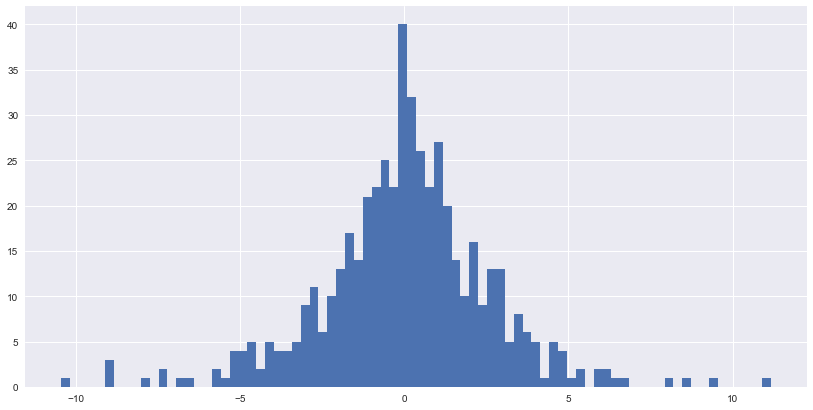

In [37]:
tsla_df.p_change.hist(bins=80);

### 4.3.1 数据的离散化

In [38]:
cats = pd.qcut(np.abs(tsla_df.p_change), 10)
cats.value_counts()

(4.221, 11.17]    51
(2.324, 3.01]     51
(1.764, 2.324]    51
(0.72, 1.04]      51
(0.436, 0.72]     51
[0.01, 0.192]     51
(1.34, 1.764]     50
(0.192, 0.436]    50
(3.01, 4.221]     49
(1.04, 1.34]      49
Name: p_change, dtype: int64

In [39]:
# 将涨跌幅数据手工分类，从负无穷到－7，－5，－3，0， 3， 5， 7，正无穷
bins = [-np.inf, -7.0, -5, -3, 0, 3, 5, 7, np.inf]
cats = pd.cut(tsla_df.p_change, bins)
cats.value_counts()

(0, 3]        209
(-3, 0]       193
(3, 5]         38
(-5, -3]       35
(5, 7]          9
(-7, -5]        9
(-inf, -7]      7
(7, inf]        4
Name: p_change, dtype: int64

In [40]:
# cr_dummies为列名称前缀
change_ration_dummies = pd.get_dummies(cats, prefix='cr_dummies')
change_ration_dummies.head()

,"cr_dummies_(-inf, -7]","cr_dummies_(-7, -5]","cr_dummies_(-5, -3]","cr_dummies_(-3, 0]","cr_dummies_(0, 3]","cr_dummies_(3, 5]","cr_dummies_(5, 7]","cr_dummies_(7, inf]"
2014-07-23,0,0,0,0,1,0,0,0
2014-07-24,0,0,0,0,1,0,0,0
2014-07-25,0,0,0,0,1,0,0,0
2014-07-28,0,0,0,0,1,0,0,0
2014-07-29,0,0,0,0,1,0,0,0


### 4.3.2 concat, append, merge的使用

In [41]:
pd.concat([tsla_df, change_ration_dummies], axis=1).tail()

,close,high,low,p_change,open,pre_close,...,"cr_dummies_(-5, -3]","cr_dummies_(-3, 0]","cr_dummies_(0, 3]","cr_dummies_(3, 5]","cr_dummies_(5, 7]","cr_dummies_(7, inf]"
2016-07-20,228.36,229.800,225.00,1.38,226.47,225.26,...,0,0,1,0,0,0
2016-07-21,220.50,227.847,219.10,-3.44,226.00,228.36,...,1,0,0,0,0,0
2016-07-22,222.27,224.500,218.88,0.80,221.99,220.50,...,0,0,1,0,0,0
2016-07-25,230.01,231.390,221.37,3.48,222.27,222.27,...,0,0,0,1,0,0
2016-07-26,225.93,228.740,225.63,-1.77,227.34,230.01,...,0,1,0,0,0,0


In [42]:
# pd.concat的连接axis＝0：纵向连接atr>14的df和p_change > 10的df
pd.concat([tsla_df[tsla_df.p_change > 10],
           tsla_df[tsla_df.atr14 > 16]], axis=0)

# 直接使用DataFrame对象append，结果与上面pd.concat的结果一致, 表4-20所示
tsla_df[tsla_df.p_change > 10].append(
    tsla_df[tsla_df.atr14 > 16])

,close,high,low,p_change,open,pre_close,volume,date,date_week,key,atr21,atr14
2015-11-04,231.63,232.74,225.20,11.17,227.00,208.35,12726366,20151104,2,324,11.150358,10.872516
2015-08-28,248.48,251.45,241.57,2.26,241.86,242.99,5513673,20150828,4,277,14.931148,16.660318
2015-08-31,249.06,254.95,245.51,0.23,245.62,248.48,4700232,20150831,0,278,14.789664,16.324581


In [43]:
stock_a = pd.DataFrame({'stock_a': ['a', 'b', 'c', 'd', 'a'],
                 'data': list(range(5))})

stock_b = pd.DataFrame({'stock_b': ['a', 'b', 'c'],
                 'data2': list(range(3))})
pd.merge(stock_a, stock_b, left_on='stock_a', right_on='stock_b')

,data,stock_a,data2,stock_b
0,0,a,0,a
1,4,a,0,a
2,1,b,1,b
3,2,c,2,c


## 4.4 实例2 ：星期几是这个股票的‘好日子’

In [44]:
tsla_df['positive'] = np.where(tsla_df.p_change > 0, 1, 0)
tsla_df.tail()

,close,high,low,p_change,open,pre_close,...,date,date_week,key,atr21,atr14,positive
2016-07-20,228.36,229.800,225.00,1.38,226.47,225.26,...,20160720,2,499,9.192273,8.723406,1
2016-07-21,220.50,227.847,219.10,-3.44,226.00,228.36,...,20160721,3,500,9.171070,8.725091,0
2016-07-22,222.27,224.500,218.88,0.80,221.99,220.50,...,20160722,4,501,9.185781,8.779013,1
2016-07-25,230.01,231.390,221.37,3.48,222.27,222.27,...,20160725,0,502,9.266934,8.929798,1
2016-07-26,225.93,228.740,225.63,-1.77,227.34,230.01,...,20160726,1,503,9.133747,8.754098,0


### 4.4.1  构建交叉表

In [45]:
xt = pd.crosstab(tsla_df.date_week, tsla_df.positive)
xt 

positive,0,1
date_week,,
0,44,51
1,55,48
2,48,57
3,44,57
4,53,47


In [46]:
xt_pct = xt.div(xt.sum(1).astype(float), axis=0)
xt_pct

positive,0,1
date_week,,
0,0.463158,0.536842
1,0.533981,0.466019
2,0.457143,0.542857
3,0.435644,0.564356
4,0.530000,0.470000


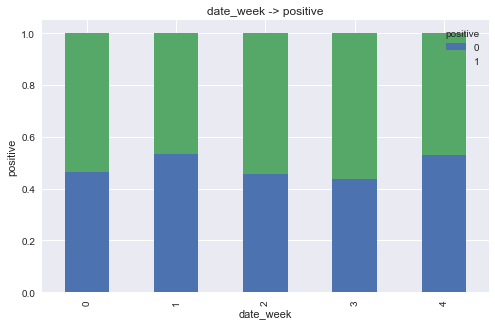

In [47]:
xt_pct.plot(
    figsize=(8, 5),
    kind='bar',
    stacked=True,
    title='date_week -> positive')
plt.xlabel('date_week')
plt.ylabel('positive')

### 4.4.2  构建透视表

In [48]:
tsla_df.pivot_table(['positive'], index=['date_week'])

,positive
date_week,
0,0.536842
1,0.466019
2,0.542857
3,0.564356
4,0.470000


In [49]:
tsla_df.groupby(['date_week', 'positive'])['positive'].count()

date_week  positive
0          0           44
           1           51
1          0           55
           1           48
2          0           48
           1           57
3          0           44
           1           57
4          0           53
           1           47
Name: positive, dtype: int64

## 4.5 实例3 ：跳空缺口

In [50]:
jump_threshold = tsla_df.close.median() * 0.03
jump_threshold

6.82845

In [51]:
jump_pd = pd.DataFrame()

def judge_jump(p_today):
    global jump_pd
    if p_today.p_change > 0 and (p_today.low - p_today.pre_close) > jump_threshold:
        """
            符合向上跳空
        """
        # jump记录方向 1向上
        p_today['jump'] = 1
        # 向上跳能量＝（今天最低 － 昨收）／ 跳空阀值
        p_today['jump_power'] = (p_today.low - p_today.pre_close) / jump_threshold
        jump_pd = jump_pd.append(p_today)
    elif p_today.p_change < 0 and (p_today.pre_close - p_today.high) > jump_threshold:
        """
            符合向下跳空
        """
        # jump记录方向 －1向下
        p_today['jump'] = -1
        # 向下跳能量＝（昨收 － 今天最高）／ 跳空阀值
        p_today['jump_power'] = (p_today.pre_close - p_today.high) / jump_threshold
        jump_pd = jump_pd.append(p_today)

for kl_index in np.arange(0, tsla_df.shape[0]):
    # 通过ix一个一个拿
    today = tsla_df.ix[kl_index]
    judge_jump(today)

# filter按照顺序只显示这些列, 表4-26所示
jump_pd.filter(['jump', 'jump_power', 'close', 'date', 'p_change', 'pre_close'])

,jump,jump_power,close,date,p_change,pre_close
2014-08-11,1.0,1.006085,259.32,20140811.0,4.51,248.13
2014-10-10,-1.0,1.628481,236.91,20141010.0,-7.82,257.01
2015-01-14,-1.0,1.325337,192.69,20150114.0,-5.66,204.25
2015-02-12,-1.0,1.422285,202.88,20150212.0,-4.66,212.80
2015-07-08,-1.0,1.036839,254.96,20150708.0,-4.82,267.88
2015-07-21,-1.0,1.282868,266.77,20150721.0,-5.49,282.26
2015-08-06,-1.0,2.215730,246.13,20150806.0,-8.88,270.13
2015-08-17,1.0,1.077843,254.99,20150817.0,4.87,243.15
2015-11-04,1.0,2.467617,231.63,20151104.0,11.17,208.35
2016-01-04,-1.0,1.263830,223.41,20160104.0,-6.92,240.01


In [52]:
jump_pd = pd.DataFrame()
# axis=1即行数据，tsla_df的每一条行数据即为每一个交易日数据
tsla_df.apply(judge_jump, axis=1)
jump_pd

,atr14,atr21,close,date,date_week,high,...,low,open,p_change,positive,pre_close,volume
2014-08-11,9.757172,9.645537,259.32,20140811.0,0.0,263.740,...,255.00,255.48,4.51,1.0,248.13,8101276.0
2014-08-11,9.757172,9.645537,259.32,20140811.0,0.0,263.740,...,255.00,255.48,4.51,1.0,248.13,8101276.0
2014-10-10,11.333807,10.898735,236.91,20141010.0,4.0,245.890,...,235.20,244.64,-7.82,0.0,257.01,12898280.0
2015-01-14,9.421497,9.550873,192.69,20150114.0,2.0,195.200,...,185.00,185.83,-5.66,0.0,204.25,11551860.0
2015-02-12,9.973965,9.781666,202.88,20150212.0,3.0,203.088,...,193.28,193.57,-4.66,0.0,212.80,15649610.0
2015-07-08,10.057524,9.208425,254.96,20150708.0,2.0,260.800,...,254.31,259.32,-4.82,0.0,267.88,6221077.0
2015-07-21,9.982710,9.400292,266.77,20150721.0,1.0,273.500,...,266.55,270.05,-5.49,0.0,282.26,6108686.0
2015-08-06,11.594563,10.797217,246.13,20150806.0,3.0,255.000,...,236.12,249.54,-8.88,0.0,270.13,14623754.0
2015-08-17,11.975285,11.345597,254.99,20150817.0,0.0,256.590,...,250.51,255.56,4.87,1.0,243.15,7176690.0
2015-11-04,10.872516,11.150358,231.63,20151104.0,2.0,232.740,...,225.20,227.00,11.17,1.0,208.35,12726366.0


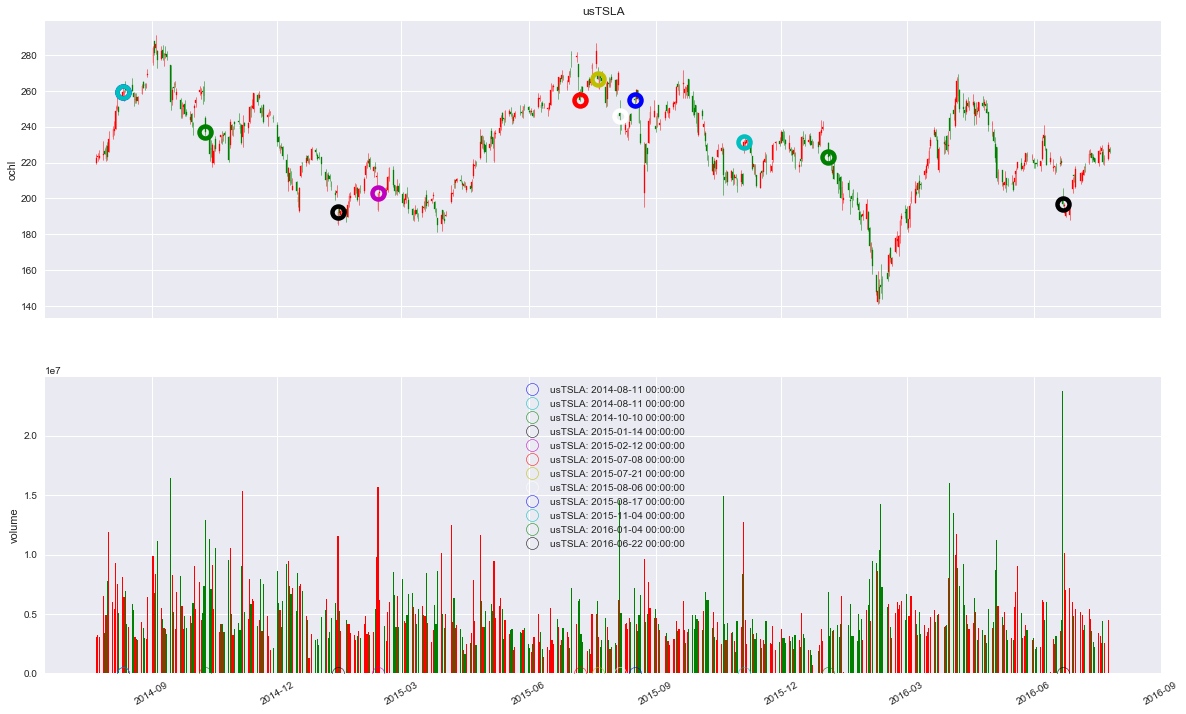

In [53]:
from abupy import ABuMarketDrawing
# view_indexs传入jump_pd.index，即在k图上使用圆来标示跳空点
ABuMarketDrawing.plot_candle_form_klpd(tsla_df, view_indexs=jump_pd.index)

## 4.6 pandas三维面板的使用

In [3]:
# disable_example_env_ipython不再使用沙盒数据，因为沙盒里面没有相关tsla行业的数据啊
abupy.env.disable_example_env_ipython()

disable example env


In [59]:
abupy.env.g_data_fetch_mode = abupy.env.EMarketDataFetchMode.E_DATA_FETCH_FORCE_NET

In [4]:
from abupy import ABuIndustries
r_symbol = 'usTSLA'
# 这里获取了和TSLA电动车处于同一行业的股票组成pandas三维面板Panel数据
p_date, _ = ABuIndustries.get_industries_panel_from_target(r_symbol, show=False)

In [5]:
type(p_date)

pandas.core.panel.Panel

In [6]:
p_date

<class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 502 (major_axis) x 12 (minor_axis)
Items axis: usF to usTTM
Major_axis axis: 2015-05-06 00:00:00 to 2017-05-04 00:00:00
Minor_axis axis: close to key

In [7]:
p_date['usTTM'].head()

,close,high,low,p_change,open,pre_close,volume,date,date_week,atr21,atr14,key
2015-05-06,40.08,40.95,39.81,-2.12,40.84,40.95,1460175.0,20150506.0,2.0,1.416097,1.411197,0.0
2015-05-07,39.96,40.05,39.63,-0.30,39.65,40.08,1183477.0,20150507.0,3.0,1.416097,1.411197,1.0
2015-05-08,42.63,42.90,41.30,6.68,41.61,39.96,2265911.0,20150508.0,4.0,1.416097,1.411197,2.0
2015-05-11,42.04,43.38,41.92,-1.38,43.09,42.63,1535718.0,20150511.0,0.0,1.416097,1.411197,3.0
2015-05-12,41.41,41.77,41.27,-1.50,41.57,42.04,994259.0,20150512.0,1.0,1.416097,1.411197,4.0


In [8]:
p_data_it = p_date.swapaxes('items', 'minor')
p_data_it

<class 'pandas.core.panel.Panel'>
Dimensions: 12 (items) x 502 (major_axis) x 6 (minor_axis)
Items axis: close to key
Major_axis axis: 2015-05-06 00:00:00 to 2017-05-04 00:00:00
Minor_axis axis: usF to usTTM

In [9]:
p_data_it_close = p_data_it['close'].dropna(axis=0)
p_data_it_close.tail()

,usF,usGM,usHMC,usTM,usTSLA,usTTM
2017-04-28,11.47,34.64,29.10,108.14,314.07,35.67
2017-05-01,11.42,34.20,29.08,108.30,322.83,35.17
2017-05-02,10.92,33.20,28.89,109.24,318.89,34.81
2017-05-03,11.07,33.48,28.92,108.87,311.02,34.70
2017-05-04,11.00,33.20,28.97,108.86,295.98,33.97


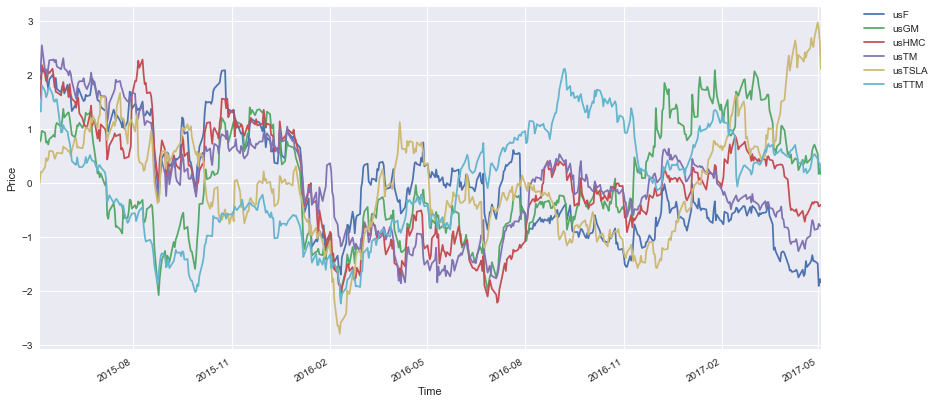

In [10]:
from abupy import ABuScalerUtil
# ABuScalerUtil.scaler_std将所有close的切面数据做(group - group.mean()) / group.std()标示化，为了可视化在同一范围
p_data_it_close = ABuScalerUtil.scaler_std(p_data_it_close)
p_data_it_close.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Price')
plt.xlabel('Time')